In [74]:
from sklearn.datasets import make_classification 
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create problem with 100 samples and 2 classes
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2 , class_sep=2, flip_y=0, n_clusters_per_class=1, random_state=1234)
scaler = MinMaxScaler((10, 99))
X = scaler.fit_transform(X, y).astype(int)

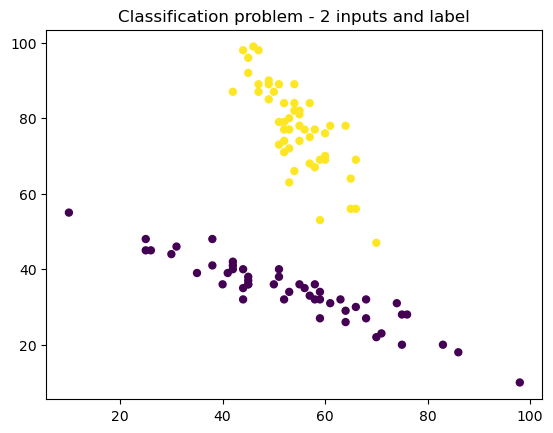

In [75]:
import matplotlib.pyplot as plt 

plt.title("Classification problem - 2 inputs and label")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25)
plt.show()

In [61]:
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

In [4]:
import torch

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model_name = "google/gemma-2-2b"

# Load the model
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", torch_dtype=torch.bfloat16)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

In [39]:
# Encode the text into tokens
prompt = """Given pairs of numbers and their labels, predict the label for a new input pair of numbers based on the provided data. I will
give you first some examples. Your task is to predict the label and only answer with only one of the labels ‘Foo’ and ‘Bar’:\n"""

model_answers = []

# First iteration 
label = "Foo" if y[0]==1 else "Bar"
prompt = prompt + f"Input: {X[0][0]} and {X[0][1]}:\n" + f"Label: {label}\n"

for observation in range(1, X.shape[0]):
    label = "Foo" if y[observation]==1 else "Bar"
    model_input = prompt + f"Input: {X[observation][0]} and {X[observation][1]}:\n" + f"Label: "
    tokens = tokenizer.encode(model_input, return_tensors="pt").to(model.device)
    output = model(tokens, return_dict=True, output_attentions=False)
    next_token_id = output["logits"][0,-1,:].argmax()
    prediction = tokenizer.decode(next_token_id)
    model_answers.append(prediction)
    print("LLM prediction: " + prediction + "\n")
    prompt = prompt + f"Input: {X[observation][0]} and {X[observation][1]}:\n" + f"Label: {label}\n"
    print("Prompt: " + prompt)

    
    

LLM prediction: <strong>

Prompt: Given pairs of numbers and their labels, predict the label for a new input pair of numbers based on the provided data. I will
give you first some examples. Your task is to predict the label and only answer with only one of the labels ‘Foo’ and ‘Bar’:
Input: 56 and 81:
Label: Foo
Input: 28 and 49:
Label: Bar

LLM prediction: 1

Prompt: Given pairs of numbers and their labels, predict the label for a new input pair of numbers based on the provided data. I will
give you first some examples. Your task is to predict the label and only answer with only one of the labels ‘Foo’ and ‘Bar’:
Input: 56 and 81:
Label: Foo
Input: 28 and 49:
Label: Bar
Input: 44 and 27:
Label: Bar

LLM prediction: 1

Prompt: Given pairs of numbers and their labels, predict the label for a new input pair of numbers based on the provided data. I will
give you first some examples. Your task is to predict the label and only answer with only one of the labels ‘Foo’ and ‘Bar’:
Input: 56 an

KeyboardInterrupt: 

In [14]:
output["logits"][0,-1,:].argmax()

tensor(3678, device='mps:0')

In [16]:
output["logits"][0,-1,:].shape

torch.Size([256000])

In [34]:
print(model_input)

Given pairs of numbers and their labels, predict the label for a new input pair of numbers based on the provided data. I will
give you first some examples. Your task is to predict the label and only answer with only one of the labels ‘Foo’ and ‘Bar’:
Input: 56 and 81:
Label: Foo
Input: 28 and 49:
Label: Bar
Input: 44 and 27:
Label: Bar
Input: 67 and 73:
Label: Bar
Input: 40 and 85:
Label:


In [38]:
prediction[0]

' '

In [35]:
tokenizer.tokenize(model_input)

['Given',
 '▁pairs',
 '▁of',
 '▁numbers',
 '▁and',
 '▁their',
 '▁labels',
 ',',
 '▁predict',
 '▁the',
 '▁label',
 '▁for',
 '▁a',
 '▁new',
 '▁input',
 '▁pair',
 '▁of',
 '▁numbers',
 '▁based',
 '▁on',
 '▁the',
 '▁provided',
 '▁data',
 '.',
 '▁I',
 '▁will',
 '\n',
 'give',
 '▁you',
 '▁first',
 '▁some',
 '▁examples',
 '.',
 '▁Your',
 '▁task',
 '▁is',
 '▁to',
 '▁predict',
 '▁the',
 '▁label',
 '▁and',
 '▁only',
 '▁answer',
 '▁with',
 '▁only',
 '▁one',
 '▁of',
 '▁the',
 '▁labels',
 '▁‘',
 'Foo',
 '’',
 '▁and',
 '▁‘',
 'Bar',
 '’:',
 '\n',
 'Input',
 ':',
 '▁',
 '5',
 '6',
 '▁and',
 '▁',
 '8',
 '1',
 ':',
 '\n',
 'Label',
 ':',
 '▁Foo',
 '\n',
 'Input',
 ':',
 '▁',
 '2',
 '8',
 '▁and',
 '▁',
 '4',
 '9',
 ':',
 '\n',
 'Label',
 ':',
 '▁Bar',
 '\n',
 'Input',
 ':',
 '▁',
 '4',
 '4',
 '▁and',
 '▁',
 '2',
 '7',
 ':',
 '\n',
 'Label',
 ':',
 '▁Bar',
 '\n',
 'Input',
 ':',
 '▁',
 '6',
 '7',
 '▁and',
 '▁',
 '7',
 '3',
 ':',
 '\n',
 'Label',
 ':',
 '▁Bar',
 '\n',
 'Input',
 ':',
 '▁',
 '4',
 '0',
 '▁a